# 군집화(Clustering)

* 대표적인 비지도학습 알고리즘
* 레이블이 없는 데이터를 그룹화 하는 알고리즘

![clustering](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## 데이터 생성

In [4]:
def plot_data(dataset, position, title):
  X, y = dataset
  plt.subplot(position)
  plt.title(title)
  plt.scatter(X[:,0], X[:,1])

In [5]:
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

In [10]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

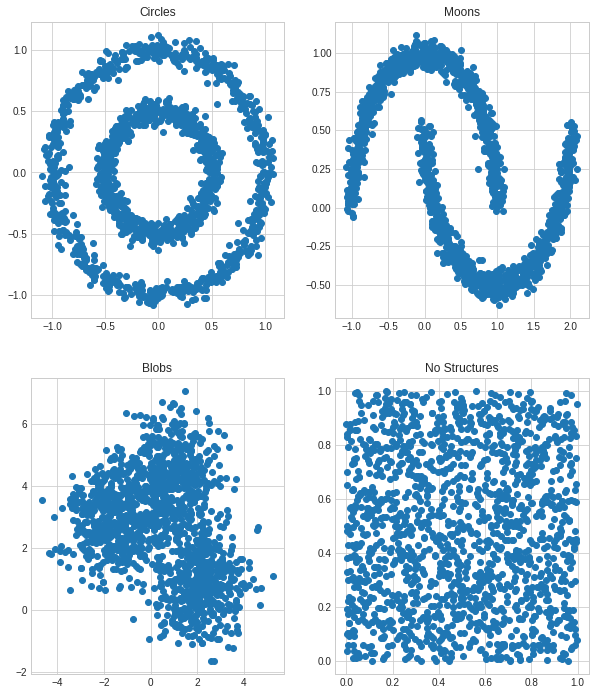

In [11]:
plt.figure(figsize=(10,12))
plot_data(circles, 221, 'Circles')
plot_data(moons, 222, 'Moons')
plot_data(blobs, 223, 'Blobs')
plot_data(no_structures, 224, 'No Structures')

In [31]:
def fit_predict_plot(model, dataset, position, title):
  X, y = dataset
  model.fit(X)
  if hasattr(model, 'labels_'):
    labels = model.labels_.astype(np.int)
  else:
    labels = model.predict(X)

  colors = np.array(['#30A9DE','#35EA40','#090707','#A593E0','#F6B352','#519D9E','#D81159','#8CD790','#353866'])
  ax = plt.subplot(position)
  ax.set_title(title)
  ax.scatter(X[:,0], X[:,1], color=colors[labels])

## K-평균 (K-Means)

* n개의 등분산 그룹으로 군집화
* 제곱합 함수를 최소화
* 군집화 개수를 지정해야 한다.
* 각 군집 $C$의 평균 $\mu_j$을 중심점 이라고 함
* 다음을 만족하는 중심점을 찾는것이 목표

\begin{equation}
\sum_{i=0}^{n} \underset{\mu_j \in C}{\min} (||x_i - \mu_j||^2)
\end{equation}

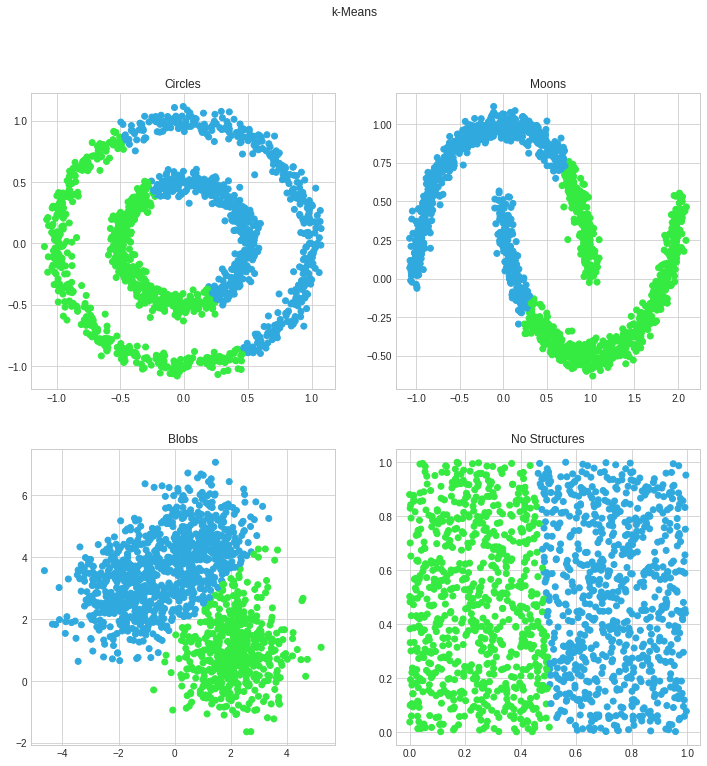

In [14]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state),circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state),no_structures, 224, 'No Structures')

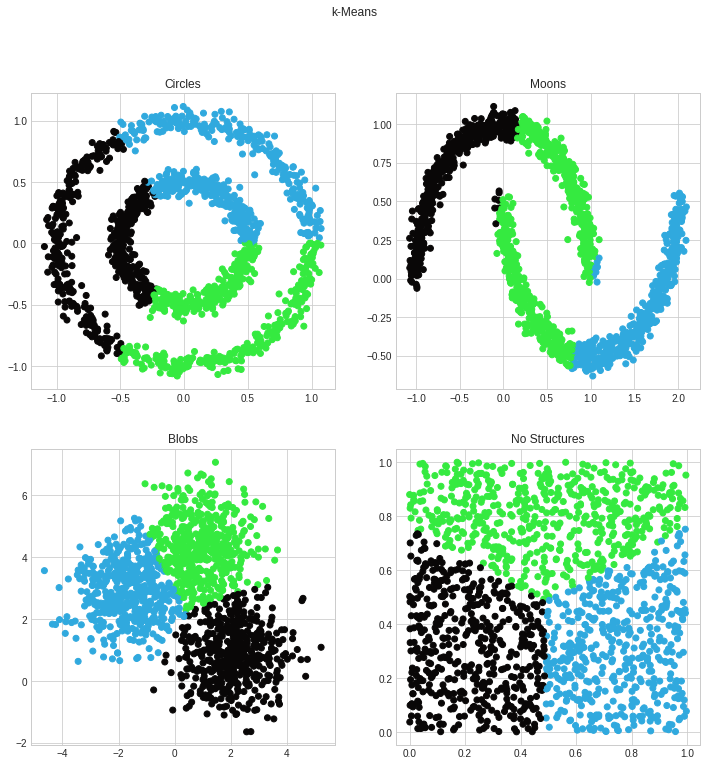

In [15]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state),circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state),no_structures, 224, 'No Structures')

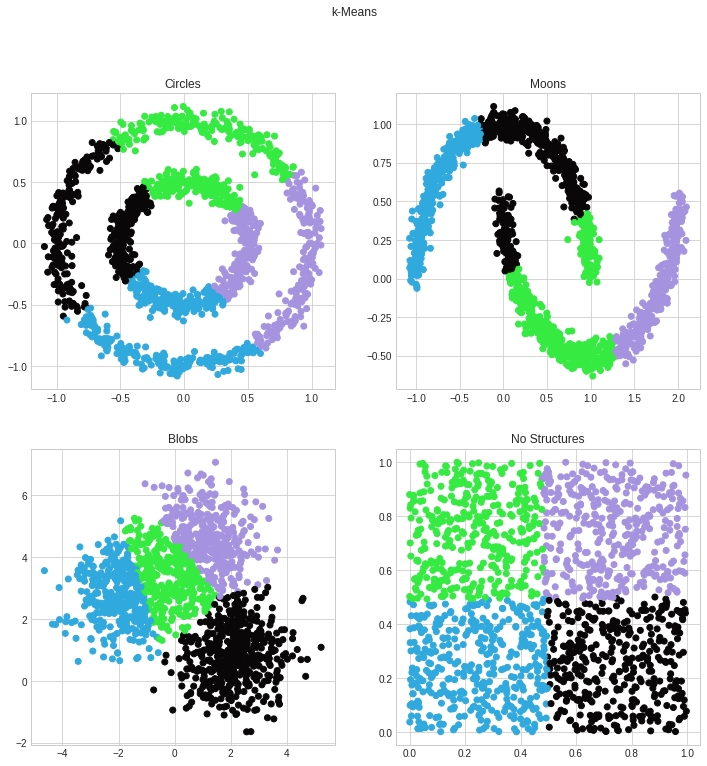

In [16]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state),circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state),no_structures, 224, 'No Structures')

### 붓꽃 데이터 군집화
* K-Means 알고리즘을 사용해 붓꽃 데이터를 군집화 해본다.
* 같은 종류의 붓꽃끼리 잘 군집화가 되었다.

In [17]:
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()

In [19]:
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data)
predict = model.predict(iris.data)

In [20]:
idx = np.where(predict==0)
iris.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [21]:
idx = np.where(predict==1)
iris.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
idx = np.where(predict==2)
iris.target[idx]

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 미니 배치 K-평균 (Mini Batch K-Means)

* 배치 처리를 통해 계산 시간을 줄인 K-평균
* K-평균과 다른 결과가 나올 수 있다.

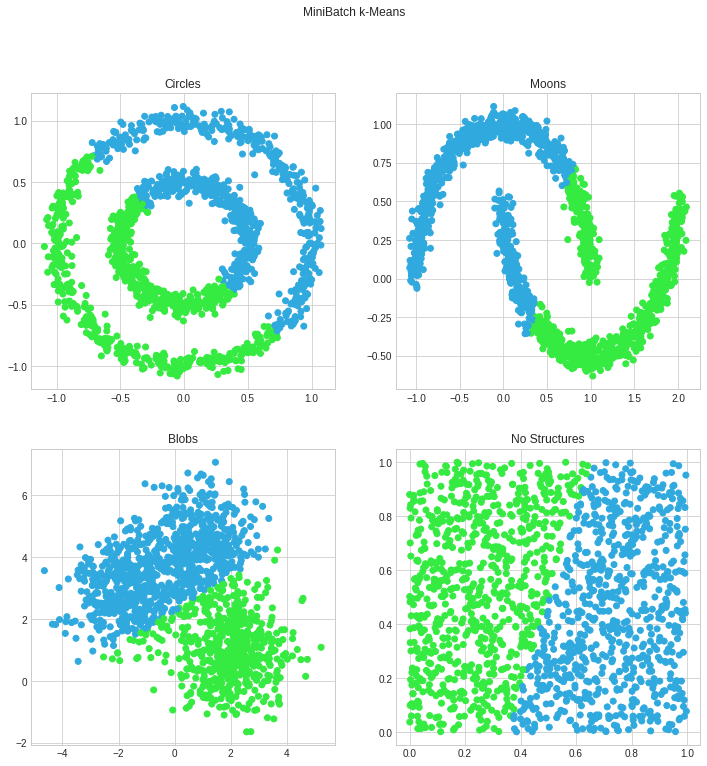

In [25]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('MiniBatch k-Means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state),circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state),no_structures, 224, 'No Structures')

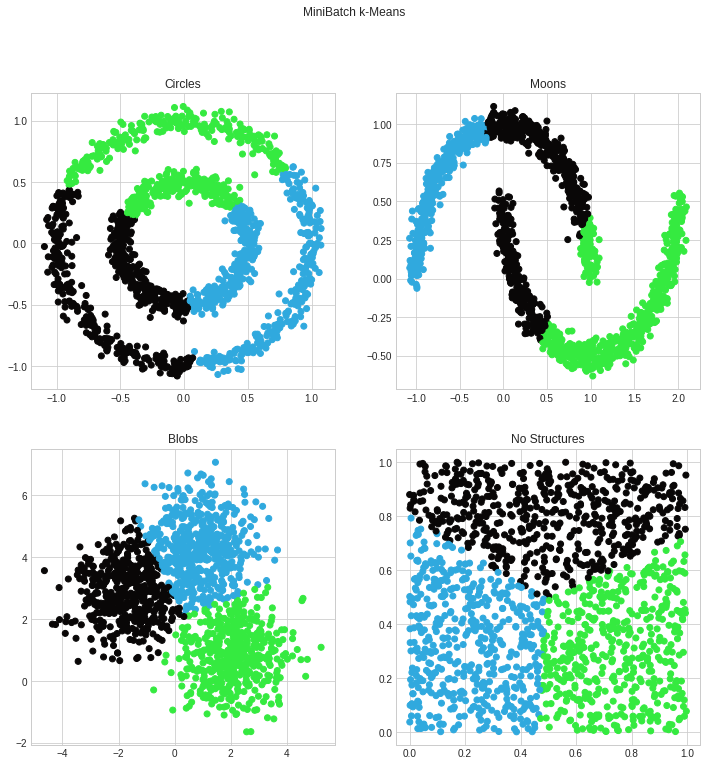

In [26]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('MiniBatch k-Means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state),circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state),no_structures, 224, 'No Structures')

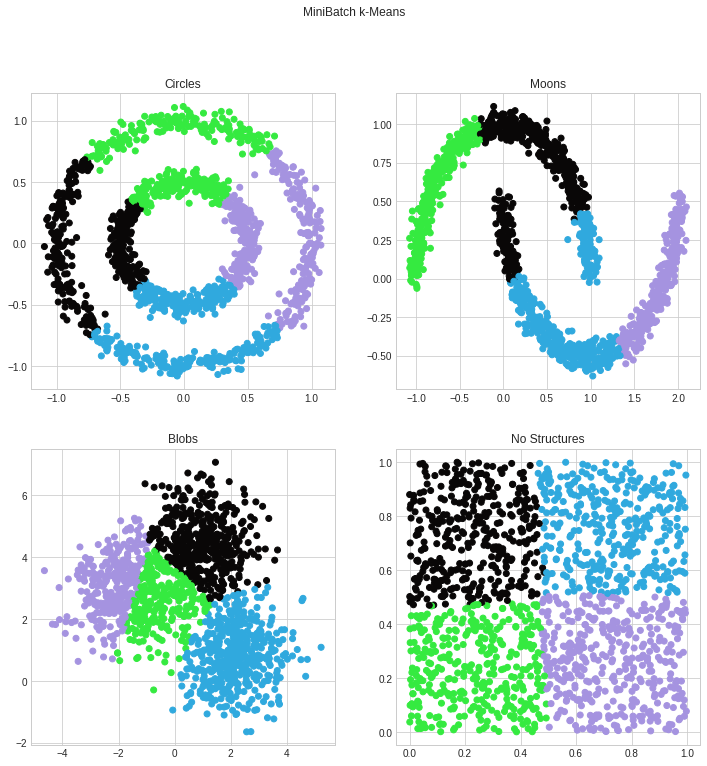

In [27]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('MiniBatch k-Means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state),circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state),no_structures, 224, 'No Structures')

## Affinity Propagation

* 샘플 쌍 끼리 메시지를 보내 군집을 생성
* 샘플을 대표하는 적절한 예를 찾을 때까지 반복
* 군집의 갯수를 자동으로 정함

![affinity propagation](https://scikit-learn.org/stable/_images/sphx_glr_plot_affinity_propagation_0011.png)

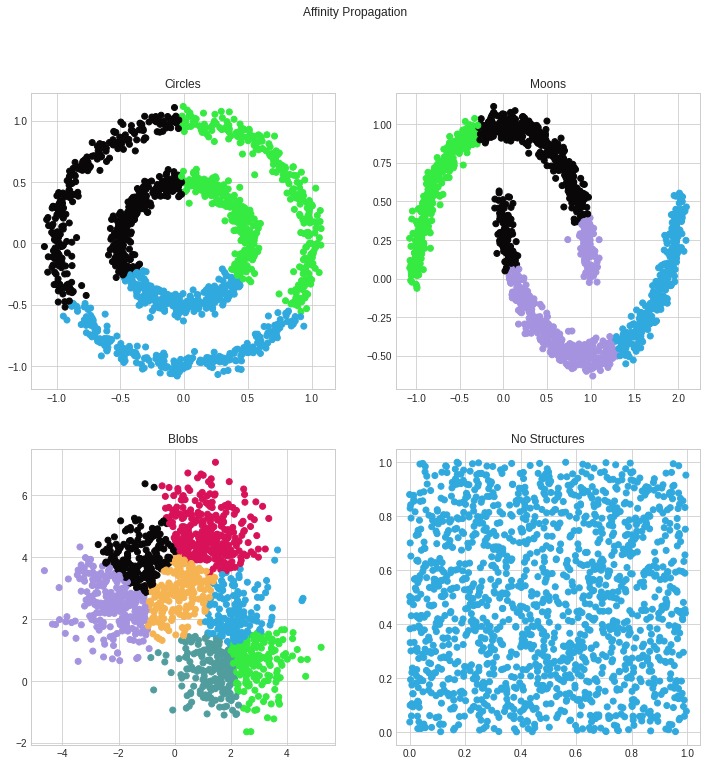

In [28]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Affinity Propagation')

fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200),circles, 221, 'Circles')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200),moons, 222, 'Moons')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200),blobs, 223, 'Blobs')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200),no_structures, 224, 'No Structures')

## Mean Shift

* 중심점 후보를 정해진 구역 내 평균으로 업데이트

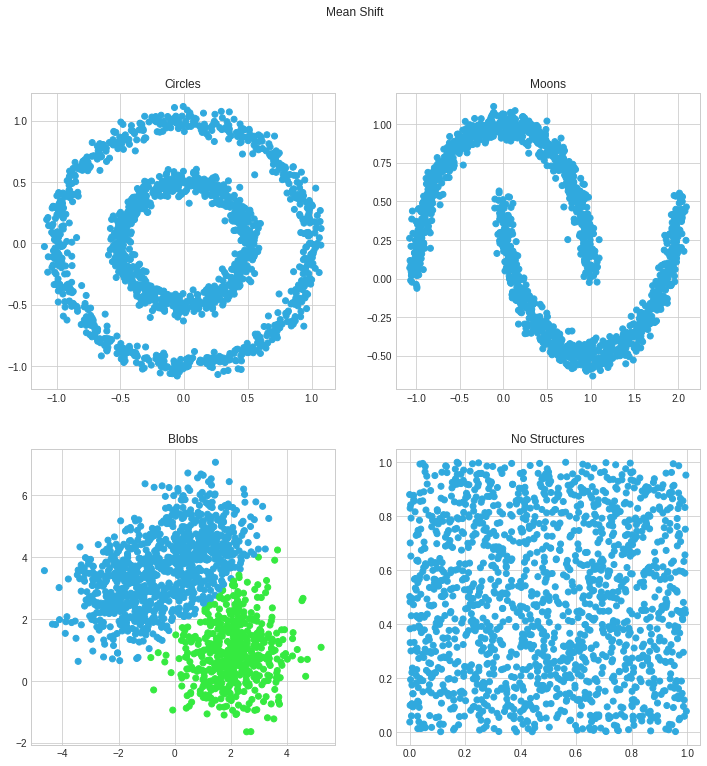

In [29]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Mean Shift')

fit_predict_plot(cluster.MeanShift(),circles, 221, 'Circles')
fit_predict_plot(cluster.MeanShift(),moons, 222, 'Moons')
fit_predict_plot(cluster.MeanShift(),blobs, 223, 'Blobs')
fit_predict_plot(cluster.MeanShift(),no_structures, 224, 'No Structures')

## 스펙트럼 군집화 (Spectral Clustering)

<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

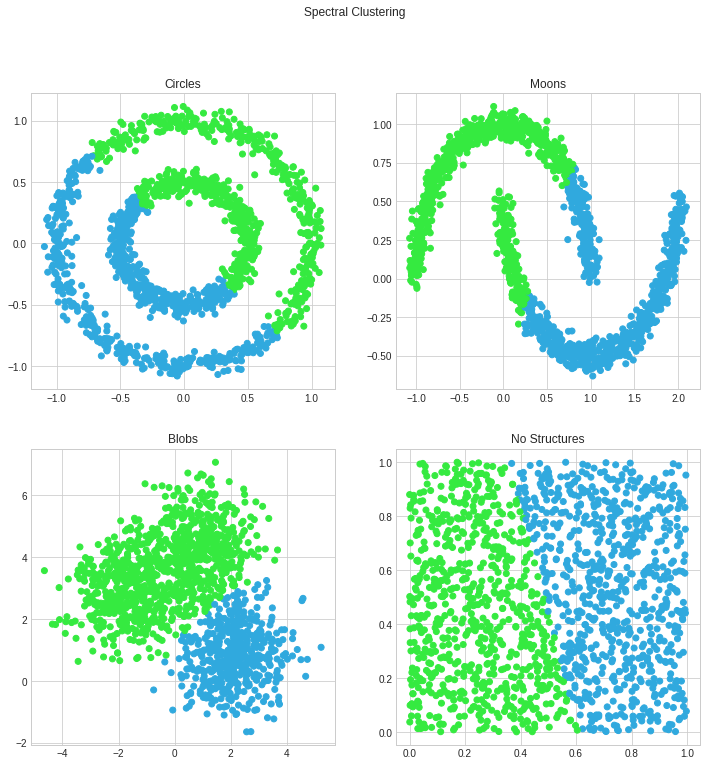

In [32]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),no_structures, 224, 'No Structures')

<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

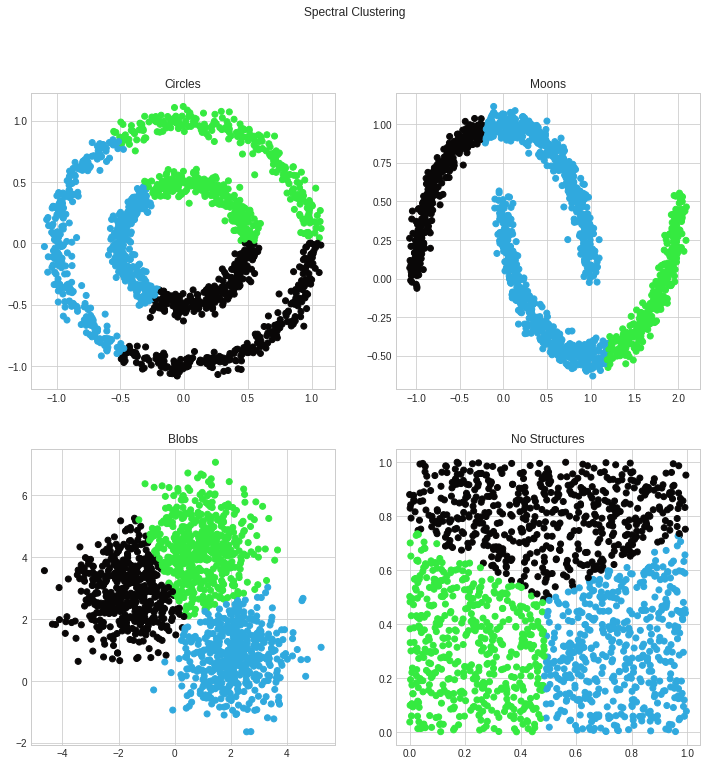

In [33]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),no_structures, 224, 'No Structures')

<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

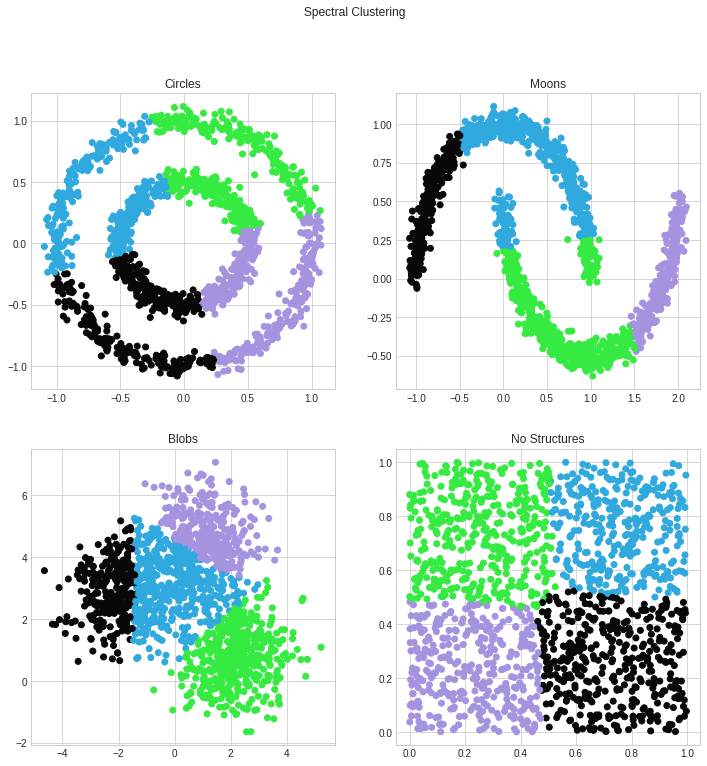

In [34]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state),circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state),moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state),blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state),no_structures, 224, 'No Structures')

### 유방암 데이터 군집화

In [35]:
from sklearn.datasets import load_breast_cancer

In [36]:
cancer = load_breast_cancer()

In [37]:
model = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity='nearest_neighbors')
model.fit(cancer.data)
predict = model.labels_

In [38]:
idx = np.where(predict==0)
cancer.target[idx]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [39]:
idx = np.where(predict==1)
cancer.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

## 계층 군집화 (Hierarchical Clustering)

<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

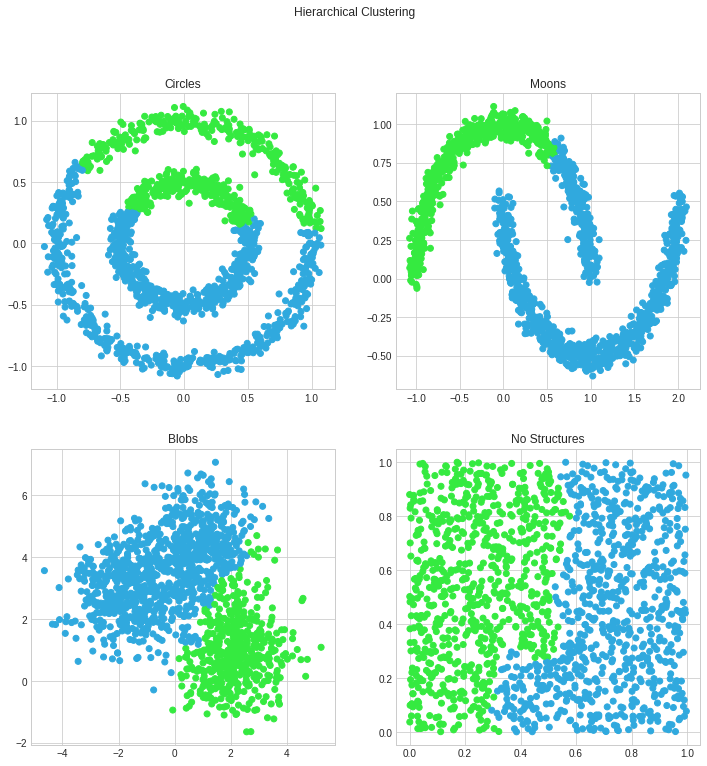

In [40]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'),circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'),moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'),blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'),no_structures, 224, 'No Structures')

<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

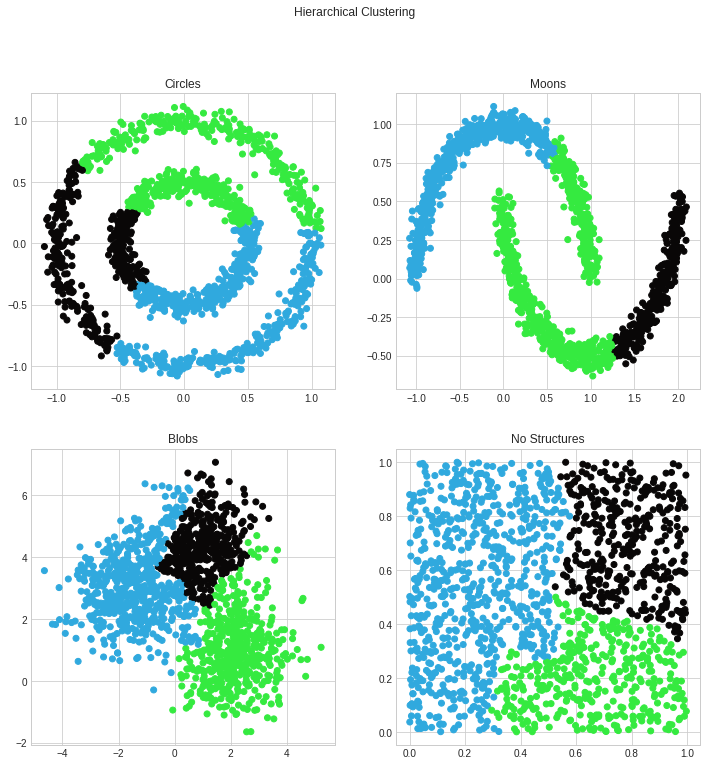

In [41]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'),circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'),moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'),blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'),no_structures, 224, 'No Structures')

<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

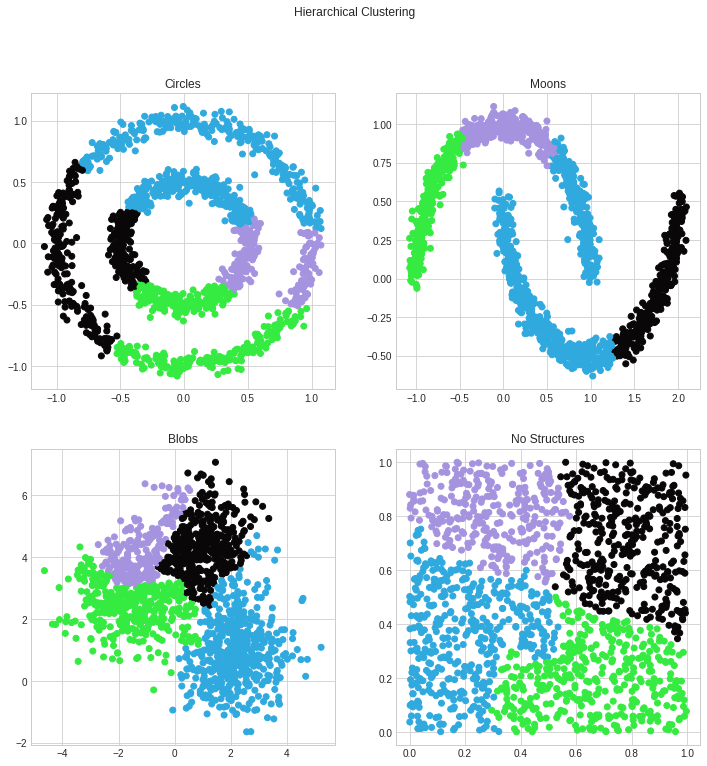

In [42]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'),circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'),moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'),blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'),no_structures, 224, 'No Structures')

### 와인 데이터 군집화

In [43]:
from sklearn.datasets import load_wine

In [44]:
wine = load_wine()

In [45]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict = model.labels_

In [46]:
idx = np.where(predict==0)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [47]:
idx = np.where(predict==1)
wine.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [48]:
idx = np.where(predict==2)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

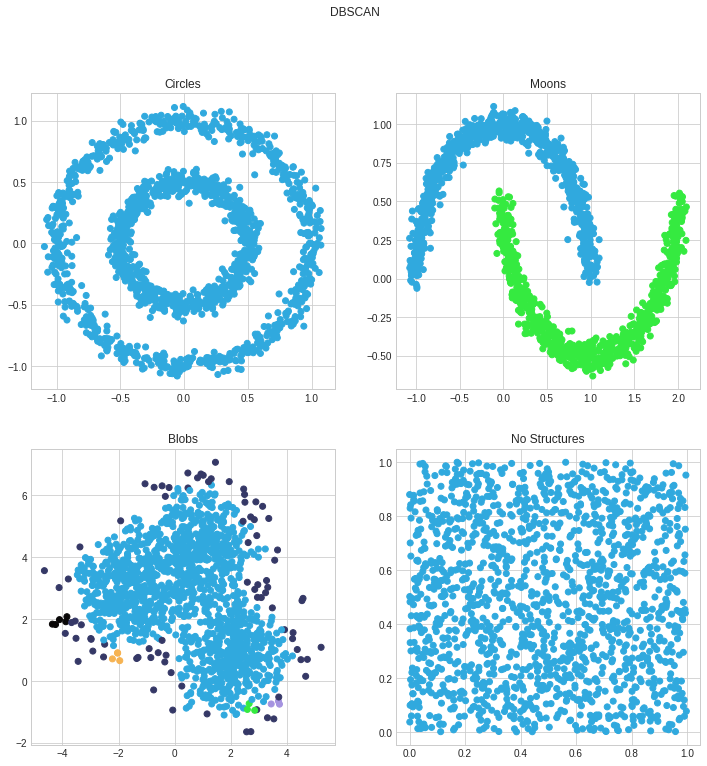

In [49]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=0.3),circles, 221, 'Circles')
fit_predict_plot(cluster.DBSCAN(eps=0.3),moons, 222, 'Moons')
fit_predict_plot(cluster.DBSCAN(eps=0.3),blobs, 223, 'Blobs')
fit_predict_plot(cluster.DBSCAN(eps=0.3),no_structures, 224, 'No Structures')

## OPTICS (Ordering Points To Identify the Clustering Structure)

<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

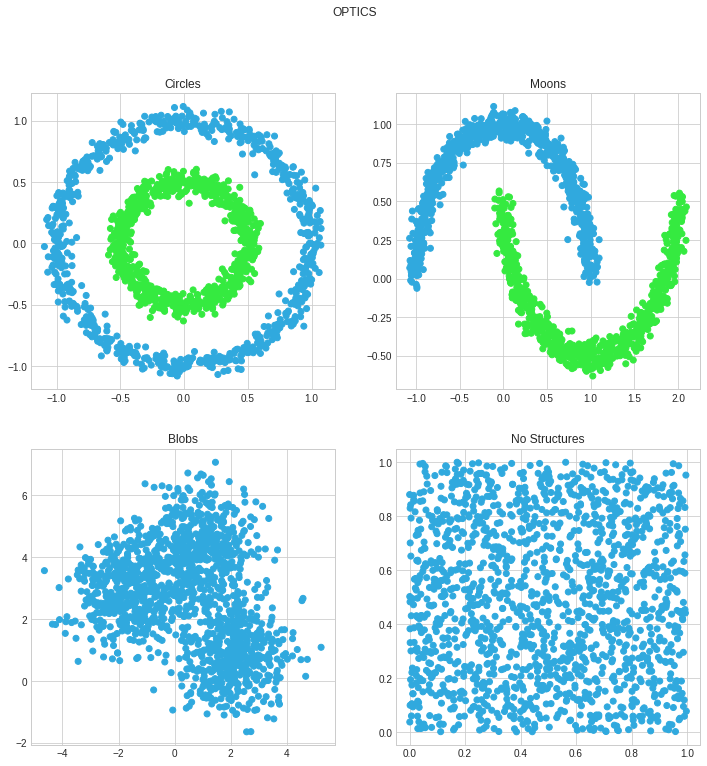

In [50]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('OPTICS')

fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),circles, 221, 'Circles')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),moons, 222, 'Moons')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),blobs, 223, 'Blobs')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),no_structures, 224, 'No Structures')

## Birch (Balanced iterative reducing and clustering using hierarchies)

<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

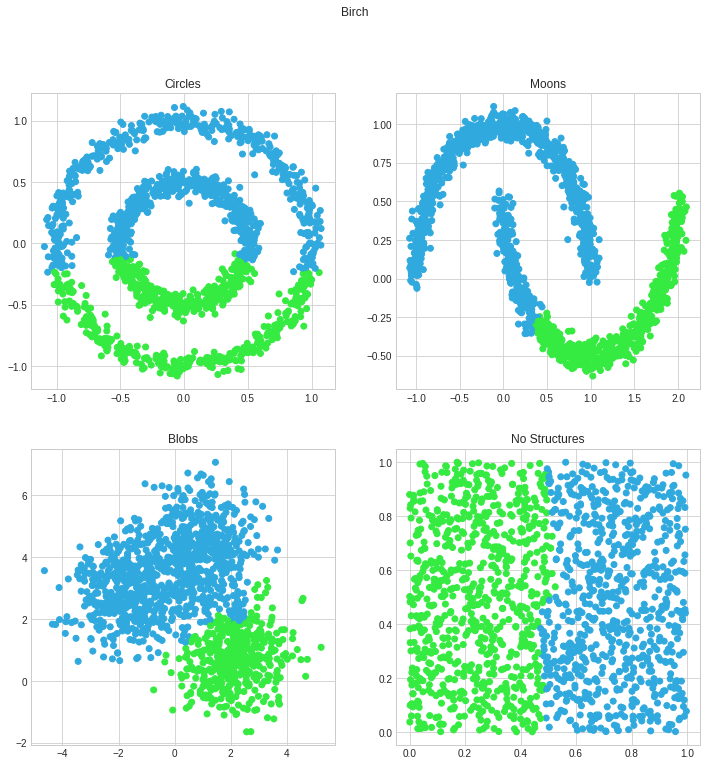

In [51]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),no_structures, 224, 'No Structures')

<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

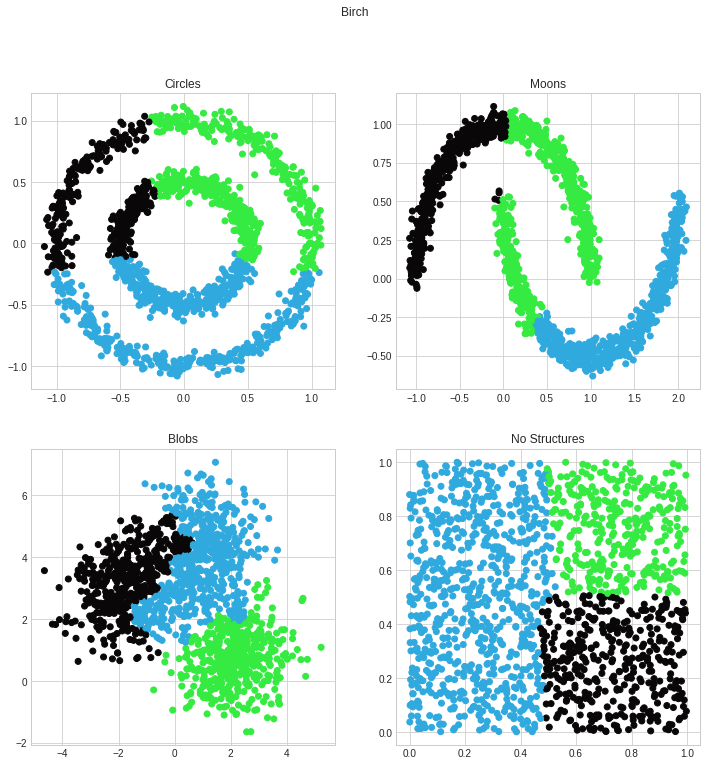

In [52]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),no_structures, 224, 'No Structures')

<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
<ipython-input-31-418ac66179d1>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

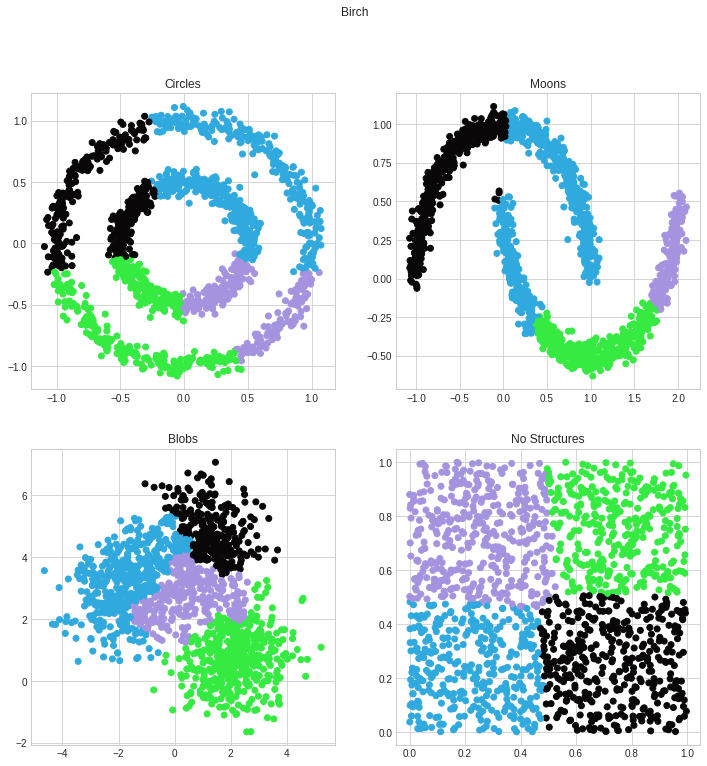

In [53]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),no_structures, 224, 'No Structures')

## 손글씨 데이터 군집화

In [54]:
from sklearn.datasets import load_digits

In [55]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [56]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [57]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [58]:
X = digits.data.reshape(-1,8,8)
y = digits.target

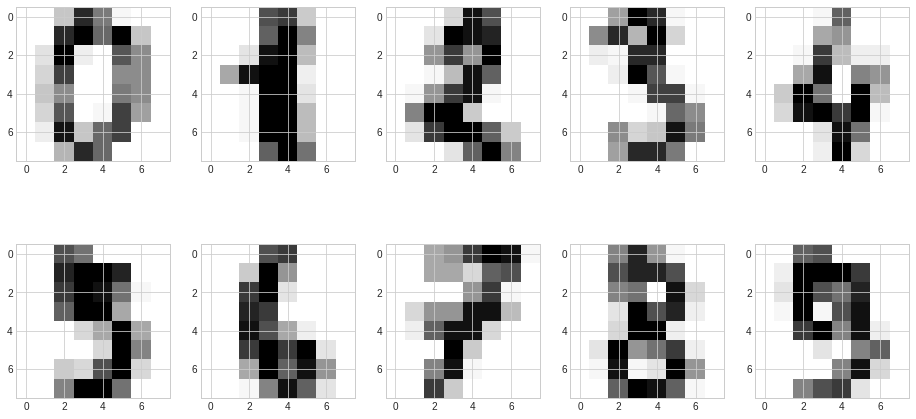

In [60]:
plt.figure(figsize=(16,8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X[i])

### K-Means

In [62]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
predict = kmeans.predict(digits.data)

In [63]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print("Cluster {} : {}".format(i+1, real_class))

Cluster 1 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Cluster 2 : [1 1 7 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 9 9 1 1 1 1 1 1 1
 1 4 1 1 1 1 4 8 9 9 4 9 9 9 9 7 9 9 9 9 9 9 9 8 8 8 8 1 1 1 1 1 1 1 1 1 1
 1 8 1 1 1 1 1 1 1 1 6 9 9 9 9 9 4]
Cluster 3 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 8 8 5 5 5 8 5 1 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 8 5 5 5 9 9 5 5 5 5 5 5 5 9 9 5 5 3 5 5 5 5 5 3
 5]
Cluster 4 : [1 2 8 8 8 8 2 2 8 2 9 8 1 6 8 1 8 2 2 8 8 8 8 8 8 8 8 8 8 4 8 8 4 8 8 8 8
 8 1 1 8 1 8 8 8 1 1 1 

Cluster : 1


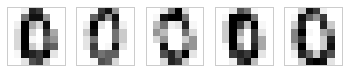

Cluster : 2


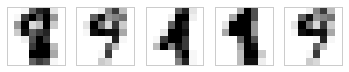

Cluster : 3


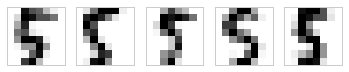

Cluster : 4


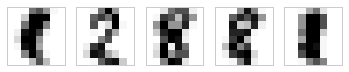

Cluster : 5


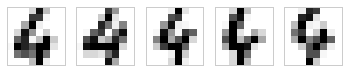

Cluster : 6


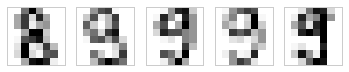

Cluster : 7


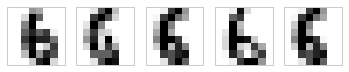

Cluster : 8


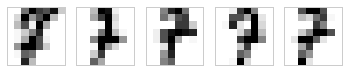

Cluster : 9


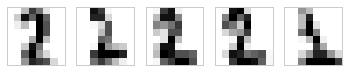

Cluster : 10


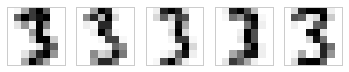

In [64]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print("Cluster : {}".format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()

### Spectral Clustering

In [66]:
spectral = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity='nearest_neighbors')
spectral.fit(digits.data)
predict = spectral.labels_

In [67]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print("Cluster {} : {}".format(i+1, real_class))

Cluster 1 : [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 8 3 3 9 3 9 3
 9 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 8 3 3 9 8 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3
 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 5 9 9 9 9 3 5 3 3 3 3 9 9 3 3 3 9
 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9
 9 9 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3
 9 3 3 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3
 3 3 3 3

Cluster : 1


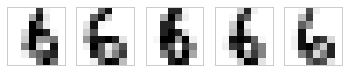

Cluster : 2


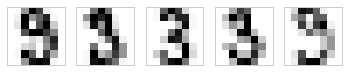

Cluster : 3


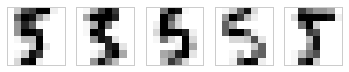

Cluster : 4


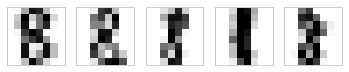

Cluster : 5


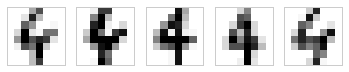

Cluster : 6


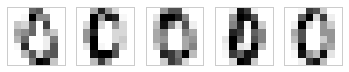

Cluster : 7


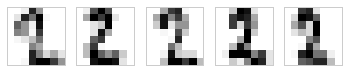

Cluster : 8


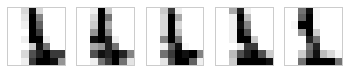

Cluster : 9


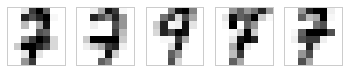

Cluster : 10


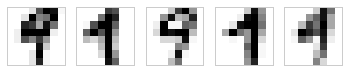

In [68]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print("Cluster : {}".format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()

### Hierarchical Clustering

In [69]:
hierarchical = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
hierarchical.fit(digits.data)
predict = hierarchical.labels_

In [70]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print("Cluster {} : {}".format(i+1, real_class))

Cluster 1 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

Cluster : 1


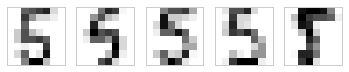

Cluster : 2


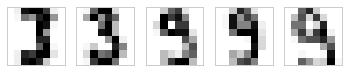

Cluster : 3


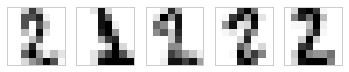

Cluster : 4


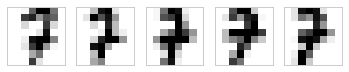

Cluster : 5


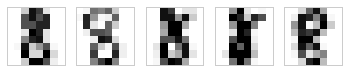

Cluster : 6


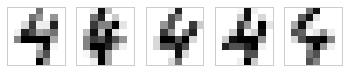

Cluster : 7


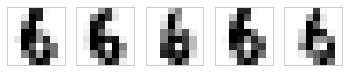

Cluster : 8


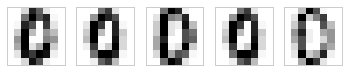

Cluster : 9


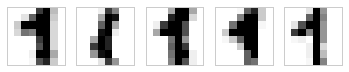

Cluster : 10


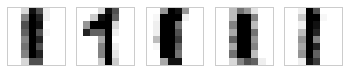

In [71]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print("Cluster : {}".format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()

### Birch

In [73]:
birch = cluster.Birch(n_clusters=10, threshold = 0.3)
birch.fit(digits.data)
predict = birch.labels_

In [74]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print("Cluster {} : {}".format(i+1, real_class))

Cluster 1 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

Cluster : 1


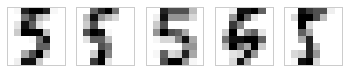

Cluster : 2


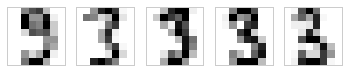

Cluster : 3


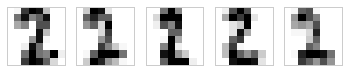

Cluster : 4


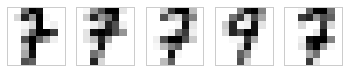

Cluster : 5


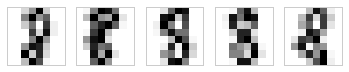

Cluster : 6


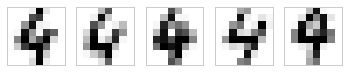

Cluster : 7


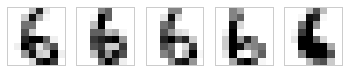

Cluster : 8


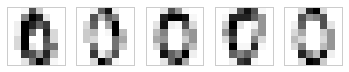

Cluster : 9


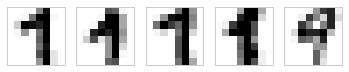

Cluster : 10


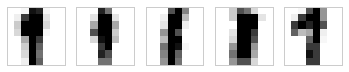

In [75]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print("Cluster : {}".format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()